In [4]:
#from IPython.external import mathjax; mathjax.install_mathjax()
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import pandas as pd
import pickle
import seaborn as sb
%matplotlib inline

In [5]:
with open('../Data/maps_nest.pickle') as f:  # Python 3: open(..., 'rb')
    coords, planck_bb, planck_mw,  phot, phot_modesub, phot_mpsub = pickle.load(f)
planck_bb.columns



{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.25,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0,
 'xtick.minor.size': 0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0,
 'ytick.minor.size': 0}

In [6]:
# Chapter 1:
### Data dimensionality
from sklearn.decomposition import PCA

def getPCA(X, n_components=12, whiten=True): # In principle, you can have as many components as input vectors
    
    X_ = X.dropna()
    # Principal component analysis
    pca = PCA(n_components=n_components, whiten=whiten)
    S_pca_ = pca.fit(X_).transform(X_)
  
    return S_pca_, pca

S_pca_, pca = getPCA(phot_mpsub)

print pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]
#+pca.explained_variance_ratio_[3]+pca.explained_variance_ratio_[4]

0.991409848538


In [12]:
pca.explained_variance_

array([  8.91784573e+04,   4.60929251e+03,   5.15707372e+02,
         4.44167828e+02,   1.43034320e+02,   9.64289514e+01,
         5.08513435e+01,   4.42866700e+01,   2.96735742e+01,
         5.89878771e+00,   2.36904577e+00,   3.89473431e-01])

<Container object of 12 artists>

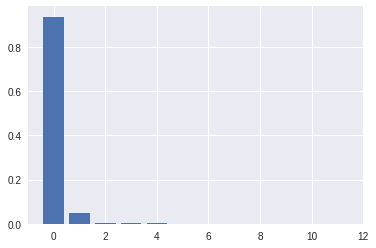

In [20]:
plt.bar(range(0,np.size(pca.explained_variance_ratio_)),
        pca.explained_variance_ratio_[:])

In [22]:
plt.scatter(pca.components_[1], mwframe.columns)

NameError: name 'mwframe' is not defined